1. Preprocess rsBOLD
2. Register to T1
3. Train End-to-End DL Model
4. Predict CVR
5. Evaluate and Visualize


In [3]:
import os
import re
import shutil
from concurrent.futures import ThreadPoolExecutor
import subprocess
import zipfile

# Define the root directory for the search and output directory
root_dir = '/Volumes/R50VOL1/SourceData/Strucfunc/'
output_dir = '/Users/muhammadmahajna/workspace/research/data/CVR'
os.makedirs(output_dir, exist_ok=True)

# Dictionary for unique patient folder paths
unique_patient_folders = {}

# Regular expression to match patient identifiers (SFXXXXX, sfXXXXX, SF_XXXXX)
patient_id_pattern = re.compile(r'sf[_]?\d{5}', re.IGNORECASE)

# Function to search for specific subfolder names within patient directories
def search_patient_folder(main_dir, subfolder_name):
    for i, patient_folder in enumerate(os.listdir(main_dir), 1):
        patient_path = os.path.join(main_dir, patient_folder)
        if os.path.isdir(patient_path):
            print(f"Checking folder {i}: {patient_folder}...", end='\r')
            match = patient_id_pattern.search(patient_folder)
            if match:
                for subfolder in os.listdir(patient_path):
                    if subfolder_name in subfolder:
                        if patient_folder not in unique_patient_folders:
                            unique_patient_folders[patient_folder] = patient_path
                        print(f"\nFound folder '{subfolder_name}' for patient: {patient_folder}")
                        break

# Function to copy and convert existing zip files to .tar.gz format
def copy_existing_zip(folder_name, folder_path):
    zip_path = f"{folder_path}.zip"
    tar_gz_path = os.path.join(output_dir, f"{folder_name}.tar.gz")

    # Skip if the .tar.gz file already exists in the output directory
    if os.path.exists(tar_gz_path):
        print(f"{tar_gz_path} already exists. Skipping conversion for {folder_name}.")
        return

    if os.path.exists(zip_path):
        print(f"Converting existing zip for {folder_name} to tar.gz...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_extract_path = os.path.join(output_dir, f"{folder_name}_temp")
            os.makedirs(zip_extract_path, exist_ok=True)
            zip_ref.extractall(zip_extract_path)
        
        subprocess.run(['tar', '-czf', tar_gz_path, '-C', zip_extract_path, '.'])
        shutil.rmtree(zip_extract_path)  # Clean up extracted files
        print(f"Converted {zip_path} to {tar_gz_path}")

# Function to zip folders that are not already zipped
def zip_patient_folder(folder_name, folder_path):
    tar_gz_path = os.path.join(output_dir, f"{folder_name}.tar.gz")

    # Skip if the .tar.gz file already exists in the output directory
    if os.path.exists(tar_gz_path):
        print(f"{tar_gz_path} already exists. Skipping zipping for {folder_name}.")
        return

    print(f"Zipping and saving {folder_name} to tar.gz...")
    subprocess.run(['tar', '-czf', tar_gz_path, '-C', folder_path, '.'])
    print(f"Zipped and saved {folder_name} to {tar_gz_path}")

# Search for 'rsBOLD-End-tidal' subfolders in the main directory
print(f"\nSearching in main directory: {root_dir}\n" + "-" * 50)
search_patient_folder(root_dir, 'rsBOLD-End-tidal')

# Search in RAW_DATA subdirectory within Strucfunc for 'rsBOLD_ET' subfolder
raw_data_dir = os.path.join(root_dir, "RAW_DATA")
if os.path.isdir(raw_data_dir):
    print(f"\nSearching in RAW_DATA subdirectory: {raw_data_dir}\n" + "-" * 50)
    search_patient_folder(raw_data_dir, 'rsBOLD_ET')

# First, copy and convert all existing zip files concurrently
print(unique_patient_folders)
with ThreadPoolExecutor(max_workers=4) as executor:
    for folder_name, path in unique_patient_folders.items():
        if os.path.exists(f"{path}.zip"):
            executor.submit(copy_existing_zip, folder_name, path)

# Then, zip folders that were not already zipped
with ThreadPoolExecutor(max_workers=8) as executor:
    for folder_name, path in unique_patient_folders.items():
        if not os.path.exists(os.path.join(path, f"{folder_name}.zip")):
            executor.submit(zip_patient_folder, folder_name, path)

print(f"\nTotal unique patient folders processed: {len(unique_patient_folders)}")



Searching in main directory: /Volumes/R50VOL1/SourceData/Strucfunc/
--------------------------------------------------
Checking folder 1: 21400-20230131-sf_01114...
Found folder 'rsBOLD-End-tidal' for patient: 21400-20230131-sf_01114
Checking folder 3: 21594-20230317-SF_01138...
Found folder 'rsBOLD-End-tidal' for patient: 21594-20230317-SF_01138
Checking folder 8: 21623-20230322-SF_01143...
Found folder 'rsBOLD-End-tidal' for patient: 21623-20230322-SF_01143
Checking folder 10: 20992-20221109-SF_01079...
Found folder 'rsBOLD-End-tidal' for patient: 20992-20221109-SF_01079
Checking folder 12: 21629-20230323-SF_01115...
Found folder 'rsBOLD-End-tidal' for patient: 21629-20230323-SF_01115
Checking folder 14: 20372-20220707-SF_01035...
Found folder 'rsBOLD-End-tidal' for patient: 20372-20220707-SF_01035
Checking folder 15: 21461-20230215-SF_01120...
Found folder 'rsBOLD-End-tidal' for patient: 21461-20230215-SF_01120
Checking folder 16: 21469-20230217-SF_01124...
Found folder 'rsBOLD-End

tar: tar: (null)(null)

tar: (null)
tar: (null)
tar: (null)
tar: (null)
tar: (null)
tar: (null)
tar: (null)
tar: (null)
tar: could not chdir to '/Volumes/R50VOL1/SourceData/Strucfunc/21112-20221205-SF_010100'

tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: could not chdir to '/Volumes/R50VOL1/SourceData/Strucfunc/21112-20221205-SF_010100'

tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn

Zipped and saved 21017-20221115-SF_01076 to /Users/muhammadmahajna/workspace/research/data/CVR/21017-20221115-SF_01076.tar.gzZipped and saved 20992-20221109-SF_01079 to /Users/muhammadmahajna/workspace/research/data/CVR/20992-20221109-SF_01079.tar.gz
/Users/muhammadmahajna/workspace/research/data/CVR/21572-20230315-SF_01129.tar.gz already exists. Skipping zipping for 21572-20230315-SF_01129.
Zipped and saved 21133-20221208-sf_01098 to /Users/muhammadmahajna/workspace/research/data/CVR/21133-20221208-sf_01098.tar.gz
Zipped and saved 19570-20220112-SF01029 to /Users/muhammadmahajna/workspace/research/data/CVR/19570-20220112-SF01029.tar.gz

Zipped and saved 20372-20220707-SF_01035 to /Users/muhammadmahajna/workspace/research/data/CVR/20372-20220707-SF_01035.tar.gz
Zipped and saved 20808-20220927-SF_01053 to /Users/muhammadmahajna/workspace/research/data/CVR/20808-20220927-SF_01053.tar.gz
Zipped and saved 20922-20221025-sf_01087 to /Users/muhammadmahajna/workspace/research/data/CVR/20922-2

tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: Error exit delayed from previous errors.
tar: .: Couldn't visit directory: Unknown error: -1
tar: .: Couldn't visit directory: Unknown error: -1
tar: Error exit delayed from previous errors.
tar: Error exit delayed from previous errors.


In [9]:
print(unique_patient_folders)


unique_patient_folders_noex = {}

for folder_name, path in unique_patient_folders.items():
    zip_path = f"{path}.zip"
    if not os.path.exists(zip_path):
        print(zip_path)
        unique_patient_folders_noex[folder_name] = path

print(unique_patient_folders_noex)


# Write the folder paths to a file
with open('folders_to_sync.txt', 'w') as f:
    for name, path in unique_patient_folders_noex.items():
        f.write(f"{path}\n")

{'21400-20230131-sf_01114': '/Volumes/R50VOL1/SourceData/Strucfunc/21400-20230131-sf_01114', '21594-20230317-SF_01138': '/Volumes/R50VOL1/SourceData/Strucfunc/21594-20230317-SF_01138', '21623-20230322-SF_01143': '/Volumes/R50VOL1/SourceData/Strucfunc/21623-20230322-SF_01143', '20992-20221109-SF_01079': '/Volumes/R50VOL1/SourceData/Strucfunc/20992-20221109-SF_01079', '21629-20230323-SF_01115': '/Volumes/R50VOL1/SourceData/Strucfunc/21629-20230323-SF_01115', '20372-20220707-SF_01035': '/Volumes/R50VOL1/SourceData/Strucfunc/20372-20220707-SF_01035', '21461-20230215-SF_01120': '/Volumes/R50VOL1/SourceData/Strucfunc/21461-20230215-SF_01120', '21469-20230217-SF_01124': '/Volumes/R50VOL1/SourceData/Strucfunc/21469-20230217-SF_01124', '20808-20220927-SF_01053': '/Volumes/R50VOL1/SourceData/Strucfunc/20808-20220927-SF_01053', '21681-20230331-SF_01142': '/Volumes/R50VOL1/SourceData/Strucfunc/21681-20230331-SF_01142', '21360-20230123-SF_01080': '/Volumes/R50VOL1/SourceData/Strucfunc/21360-2023012

In [ ]:
import os

# Specify the directory where the .nii files are located
directory = '/Users/muhammadmahajna/workspace/research/data/cvr_est_project/func/completed'

# List all .nii files in the directory
nii_files = [f for f in os.listdir(directory) if f.endswith('.gz')]

# Print the list of .nii files
for nii_file in nii_files:
    print(nii_file)




Image dimensions: (192, 256, 256)


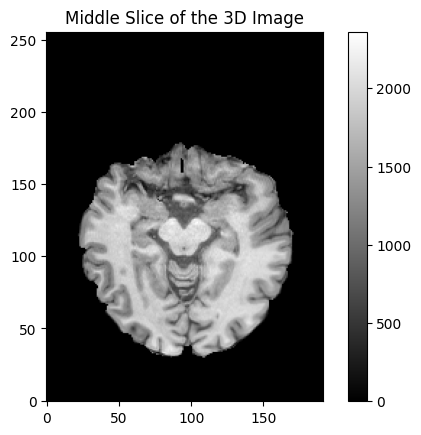

Max value in middle slice: 2362.0
Image dimensions: (192, 256, 256)


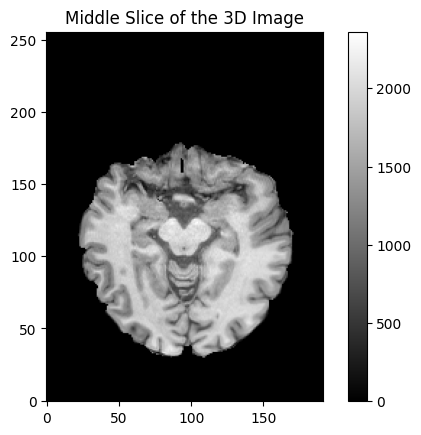

Max value in middle slice: 2362.0
Images are identical


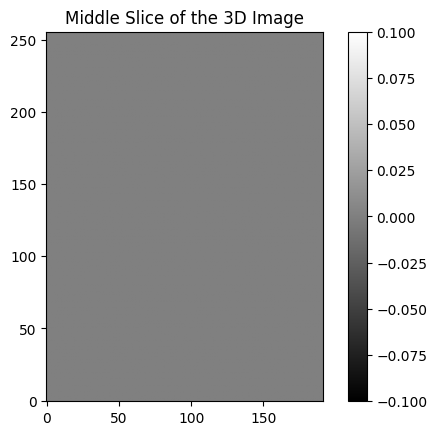

In [82]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat

def load_and_view_nii(filepath, slice):
    # Load the .nii file
    nii_image = nib.load(filepath)
    
    # Get the data as a numpy array
    image_data = nii_image.get_fdata()
    
    # Print the dimensions of the image
    print("Image dimensions:", image_data.shape)
    
    # Display the middle slice of the 3D image along the third axis
    middle_slice = image_data[:, :, slice]
    plt.imshow(middle_slice.T, cmap="gray", origin="lower")
    plt.colorbar()
    plt.title("Middle Slice of the 3D Image")
    plt.show()

    # Print max value of middle slice
    print("Max value in middle slice:", np.max(middle_slice))

    return middle_slice

# Example usage
filepath = '/Users/muhammadmahajna/workspace/research/data/cvr_est_project/struc/SF_01035_brain.nii.gz'
ref = load_and_view_nii(filepath, 110)

filepath = '/Users/muhammadmahajna/workspace/research/data/cvr/SF_01035/preprocessing_results/SF_01035_strip.nii.gz'
mine = load_and_view_nii(filepath, 110)


dff = mine.T - ref.T
if np.any(dff != 0):
    print("Image contain different values")
    print("Max value in middle slice:", np.mean(dff))
else:
    print("Images are identical")

plt.imshow(dff, cmap="gray", origin="lower")
plt.colorbar()
plt.title("Middle Slice of the 3D Image")
plt.show()


In [2]:
import nibabel as nib
import numpy as np
import pandas as pd

def extract_voxel_timeseries(filepath, output_csv):
    # Load the .nii file
    nii_image = nib.load(filepath)
    image_data = nii_image.get_fdata()
    print("Image dimensions:", image_data.shape)

    # Reshape the data to a 2D array where each row represents a voxel and each column a timepoint
    # Reshape from (x, y, z, timepoints) to (num_voxels, timepoints)
    x, y, z, t = image_data.shape
    reshaped_data = image_data.reshape((x * y * z, t))

    # Create a DataFrame where each row is a voxel's time series
    voxel_timeseries_df = pd.DataFrame(reshaped_data)
    
    # Save to CSV
    voxel_timeseries_df.to_csv(output_csv, index=False)
    print(f"Time series data for each voxel saved to {output_csv}")

# Example usage
filepath = '/Users/muhammadmahajna/workspace/research/data/cvr_est_project/func/registered/main_data/training/SF_01035_2_T1.nii'
output_csv = 'voxel_timeseries.csv'
extract_voxel_timeseries(filepath, output_csv)


Image dimensions: (64, 64, 26, 435)
Time series data for each voxel saved to voxel_timeseries.csv
